### Weather Analyis:


### Weather!!
url: https://climateknowledgeportal.worldbank.org/download-data

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.cm as cm
import numpy as np


In [3]:
url = 'https://cckpapi.worldbank.org/api/v1/cru-x0.5_timeseries_tasmax,tas,tasmin_timeseries_monthly_1901-2024_mean_historical_cru_ts4.09_mean/ITA?_format=json'

json_file = requests.get(url).json()

data = json_file['data']

var = ['tas', 'tasmax', 'tasmin']

date = []
tas = []
tasmax = []
tasmin = []

for v in var:
    for d, value in data[v]["ITA"].items():
        if v == 'tas':
            date.append(d)
            tas.append(value)
        elif v == 'tasmax':
            tasmax.append(value)
        elif v == 'tasmin':
            tasmin.append(value)

df = pd.DataFrame({
    "date": date,
    "tas": tas,
    "tasmin": tasmin,
    "tasmax": tasmax
})
df.head()

,date,tas,tasmin,tasmax
0,1901-01,2.02,-1.44,5.50
1,1901-02,0.54,-3.27,4.35
2,1901-03,6.23,2.52,9.98
3,1901-04,10.66,6.22,15.13
4,1901-05,14.07,9.02,19.15


In [8]:
df.describe()

,tas,tasmin,tasmax
count,1488.000000,1488.000000,1488.000000
mean,12.405927,8.276331,16.578683
std,6.365386,5.793167,6.970403
min,-1.020000,-4.810000,2.610000
25%,6.705000,3.180000,10.230000
50%,12.075000,7.890000,16.270000
75%,18.345000,13.670000,23.080000
max,24.700000,19.550000,29.960000


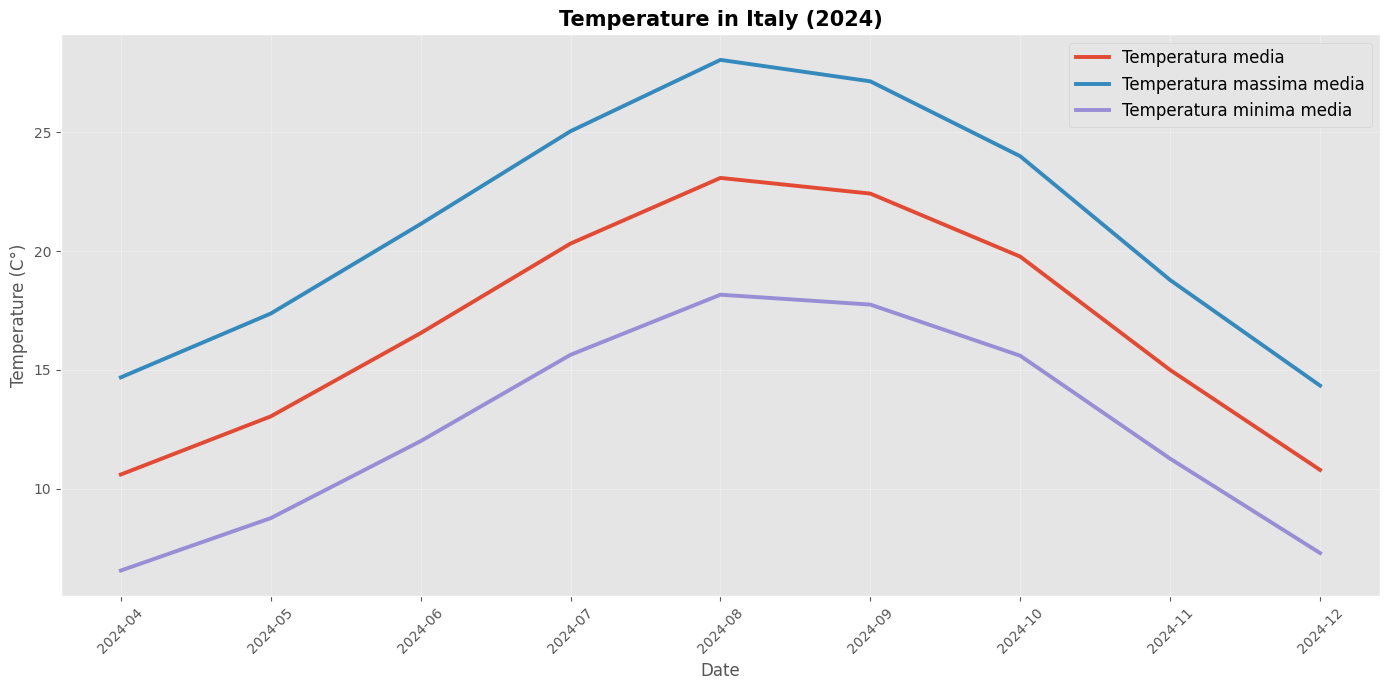

In [3]:
data_9424 = df[df['date'] >= '2024-01-01']

plt.style.use("ggplot")   # stile più elegante

fig, ax = plt.subplots(figsize=(14, 7))

# Linee morbide con rolling mean (opzionale)
smooth = data_9424.rolling(window=3, on='date').mean()

ax.plot(smooth['date'], smooth['tas'], label="Temperatura media", linewidth=2.8)
ax.plot(smooth['date'], smooth['tasmax'], label="Temperatura massima media", linewidth=2.8)
ax.plot(smooth['date'], smooth['tasmin'], label="Temperatura minima media", linewidth=2.8)

# Titoli
plt.title("Temperature in Italy (2024)", fontsize=15, weight='bold')
#plt.suptitle("Dati giornalieri con smoothing (3-day rolling mean)", fontsize=11, y=0.93)

# Etichette assi
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Temperature (C°)", fontsize=12)

# Rotazione date
plt.xticks(rotation=45, fontsize=10)

# Griglia più delicata
ax.grid(alpha=0.3)

# Legenda elegante
plt.legend(frameon=True, fontsize=12)

plt.tight_layout()
plt.show()


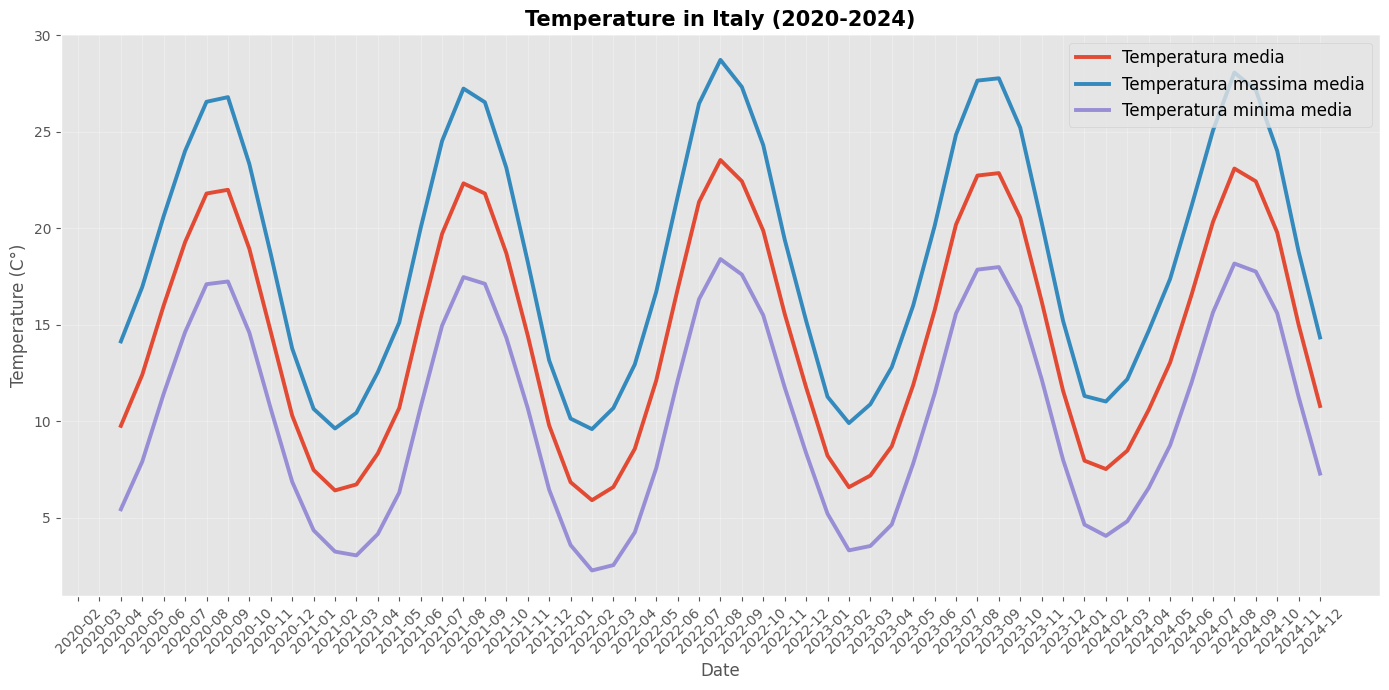

In [4]:
data_9424 = df[df['date'] >= '2020-01-01']

plt.style.use("ggplot")   # stile più elegante

fig, ax = plt.subplots(figsize=(14, 7))

# Linee morbide con rolling mean (opzionale)
smooth = data_9424.rolling(window=3, on='date').mean()

ax.plot(smooth['date'], smooth['tas'], label="Temperatura media", linewidth=2.8)
ax.plot(smooth['date'], smooth['tasmax'], label="Temperatura massima media", linewidth=2.8)
ax.plot(smooth['date'], smooth['tasmin'], label="Temperatura minima media", linewidth=2.8)

# Titoli
plt.title("Temperature in Italy (2020-2024)", fontsize=15, weight='bold')
#plt.suptitle("Dati giornalieri con smoothing (3-day rolling mean)", fontsize=11, y=0.93)

# Etichette assi
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Temperature (C°)", fontsize=12)

# Rotazione date
plt.xticks(rotation=45, fontsize=10)

# Griglia più delicata
ax.grid(alpha=0.3)

# Legenda elegante
plt.legend(frameon=True, fontsize=12)

plt.tight_layout()
plt.show()

In [14]:
df["tas"] = df["tas"].astype(str).str.replace(".", ",", regex=False)
df["tasmin"] = df["tasmin"].astype(str).str.replace(".", ",", regex=False)
df["tasmax"] = df["tasmax"].astype(str).str.replace(".", ",", regex=False)
df.to_csv("temperature_data.csv")
df["tas"] = df["tas"].astype(str).str.replace(",", ".", regex=False)
df["tasmin"] = df["tasmin"].astype(str).str.replace(",", ".", regex=False)
df["tasmax"] = df["tasmax"].astype(str).str.replace(",", ".", regex=False)
df["tas"] = df["tas"].astype(float)
df["tasmin"] = df["tasmin"].astype(float)
df["tasmax"] = df["tasmax"].astype(float)



#### First Question: Is it true that every year is the hottest summer of the last 50 years?

In [4]:
# Filter of summer months (June, July, August):
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
summer = df[df['month'].isin([6, 7, 8])]

# Group by year and calculate mean temperatures for summer months
summer_yearly = summer.groupby(summer['date'].dt.year)[['tas', 'tasmax', 'tasmin']].mean()
summer_yearly.index.name = 'year'

# Identify record-breaking years
summer_yearly['record_until_now'] = summer_yearly['tas'].cummax()
summer_yearly['is_record'] = summer_yearly['tas'] == summer_yearly['record_until_now']

# Calculate the fraction of years that are record-breaking
fraction_of_record_years = summer_yearly['is_record'].mean()


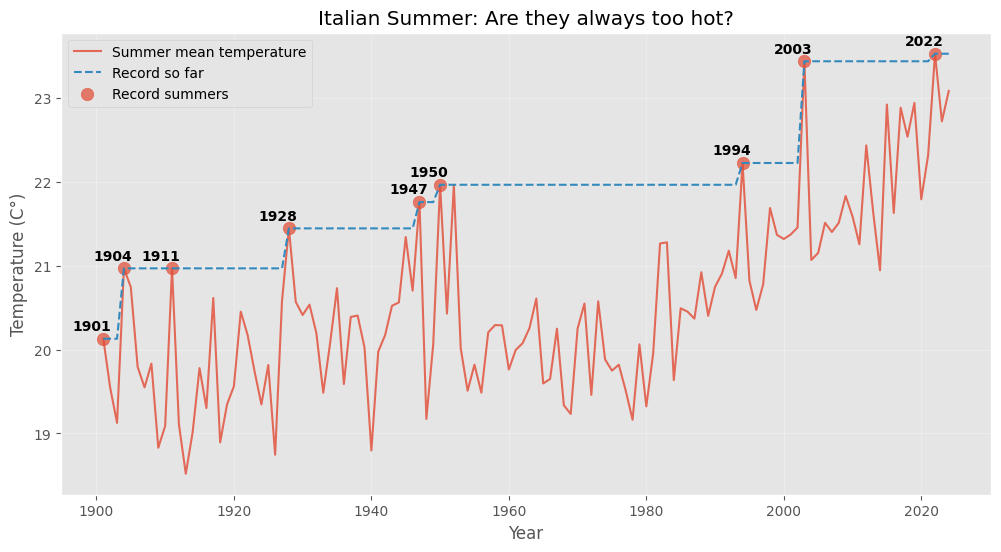

In [5]:
plt.figure(figsize=(12,6))
plt.plot(summer_yearly.index, summer_yearly['tas'], label='Summer mean temperature', alpha=0.8)
plt.plot(summer_yearly.index, summer_yearly['record_until_now'], linestyle='--', label='Record so far')
plt.scatter(summer_yearly.index[summer_yearly['is_record']],
            summer_yearly['tas'][summer_yearly['is_record']],
            s=80, label='Record summers', alpha=0.7)
#  Aggiungo gli anni accanto ai punti record
for year, temp in summer_yearly[summer_yearly['is_record']].iterrows():
    plt.annotate(
        str(year),
        (year, temp['tas']),
        textcoords="offset points",
        xytext=(6, 6),
        ha='right',
        fontsize=10,
        weight='bold'
    )
plt.title("Italian Summer: Are they always too hot?")
plt.xlabel("Year")
plt.ylabel("Temperature (C°)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


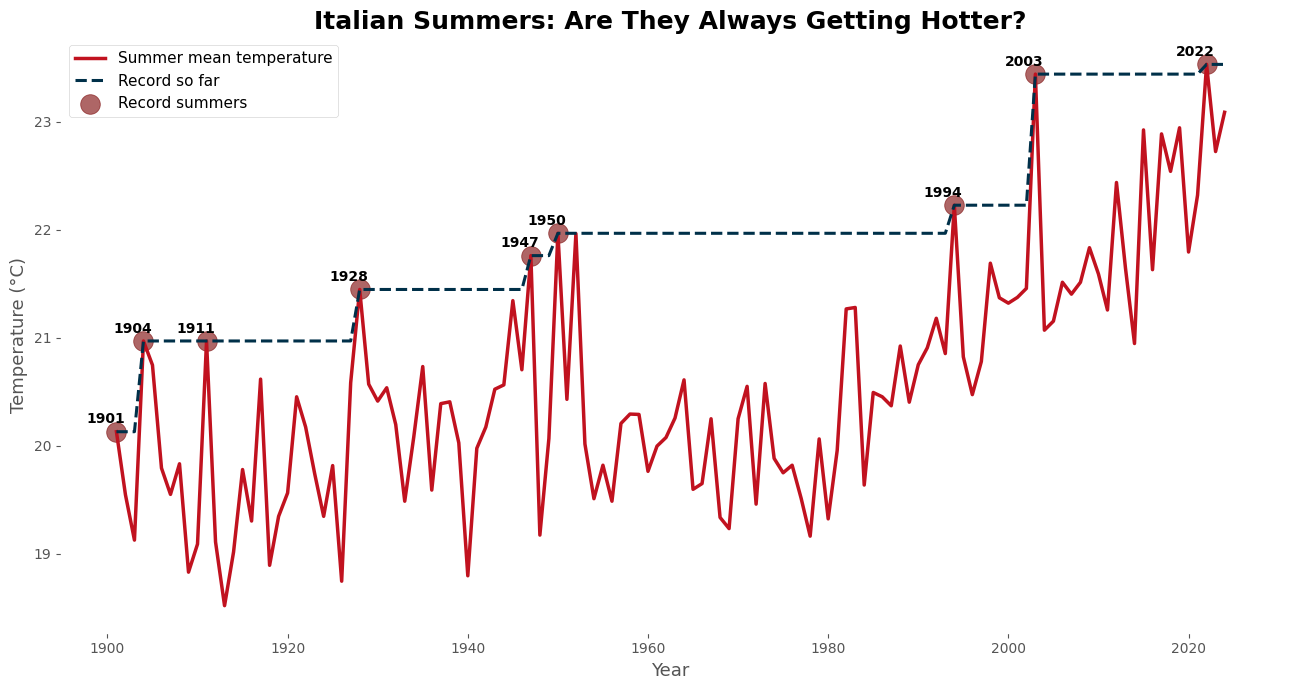

In [7]:
plt.style.use("ggplot")
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['figure.facecolor'] = '#ffffff'

color_tas = "#c1121f"
color_record_line = "#003049"
color_record_points = "#780000"

plt.figure(figsize=(13,7))

plt.plot(
    summer_yearly.index,
    summer_yearly['tas'],
    label='Summer mean temperature',
    alpha=1,
    linewidth=2.5,
    color=color_tas
)

plt.plot(
    summer_yearly.index,
    summer_yearly['record_until_now'],
    linestyle='--',
    label='Record so far',
    linewidth=2.2,
    color=color_record_line
)

plt.scatter(
    summer_yearly.index[summer_yearly['is_record']],
    summer_yearly['tas'][summer_yearly['is_record']],
    s=200,
    label='Record summers',
    alpha=0.60,
    color=color_record_points,
    edgecolor="#780000",
    linewidth=0.6
)

#  Aggiungo gli anni accanto ai punti record
for year, temp in summer_yearly[summer_yearly['is_record']].iterrows():
    plt.annotate(
        str(year),
        (year, temp['tas']),
        textcoords="offset points",
        xytext=(6, 6),
        ha='right',
        fontsize=10,
        weight='bold'
    )

plt.title("Italian Summers: Are They Always Getting Hotter?", fontsize=18, weight="bold")
plt.xlabel("Year", fontsize=13)
plt.ylabel("Temperature (°C)", fontsize=13)
plt.grid(alpha=0.25)
plt.legend(fontsize=11, frameon=True, facecolor="#ffffff")

ax = plt.gca()
ax.spines['top'].set_alpha(0)
ax.spines['right'].set_alpha(0)

plt.tight_layout()
plt.show()


#### Second Question: is it true that the mid-seasons no longer exist?

In [6]:
# Converti le date
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Definisci le stagioni
def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(season)

# Calcola la temperatura media stagionale per anno
seasonal_avg = df.groupby(['year', 'season'])['tas'].mean().reset_index()


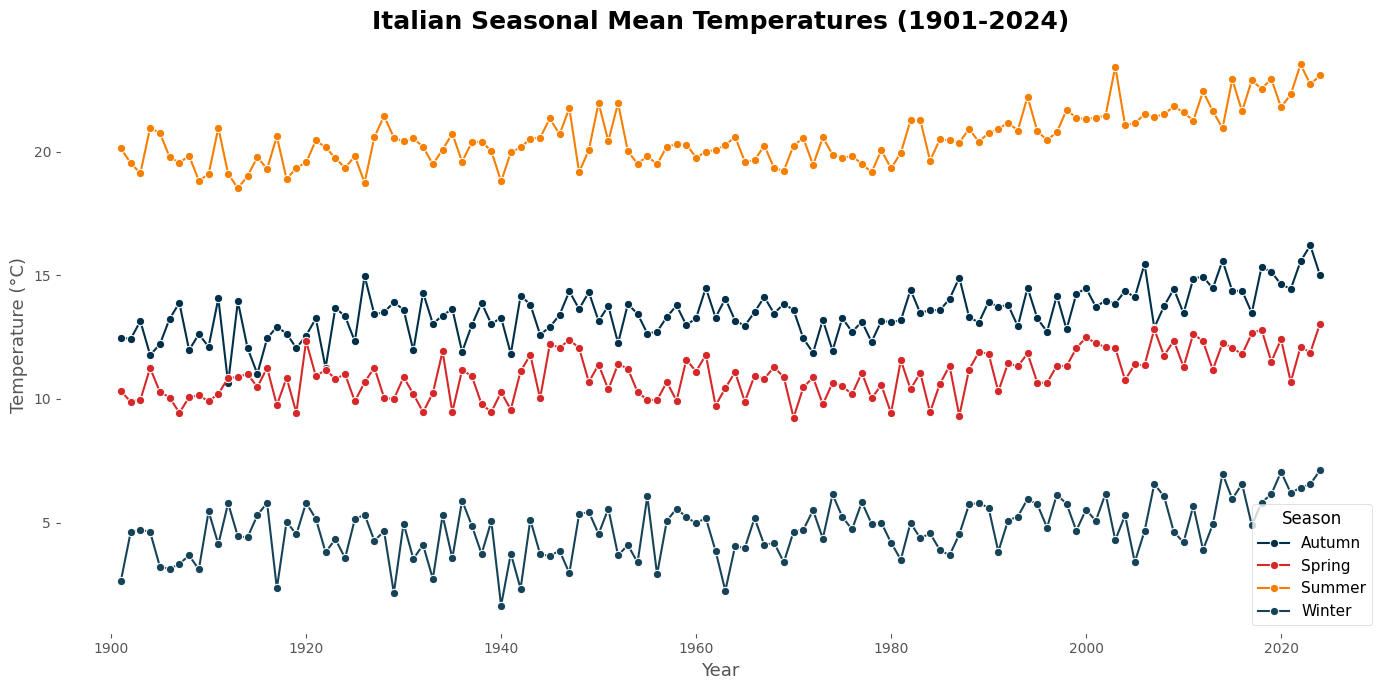

In [7]:
plt.style.use("ggplot")
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['figure.facecolor'] = '#ffffff'

plt.figure(figsize=(14,7))
sns.lineplot(data=seasonal_avg, x='year', y='tas', hue='season', marker='o', palette=['#003049','#d62828','#f77f00',"#174358"])
plt.title("Italian Seasonal Mean Temperatures (1901-2024)", fontsize=18, weight="bold")
plt.xlabel("Year", fontsize=13)
plt.ylabel("Temperature (°C)", fontsize=13)
plt.grid(alpha=0.25)
plt.legend(title="Season", fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.show()


In [17]:
plt.style.use("ggplot")
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['figure.facecolor'] = '#ffffff'

# 📊 SMOOTHING: Media mobile su 7 anni per trend puliti
seasonal_smooth = seasonal_avg.copy()
seasonal_smooth['tas_smooth'] = seasonal_smooth.groupby('season')['tas'].transform(
    lambda x: x.rolling(window=10, center=True, min_periods=3).mean())



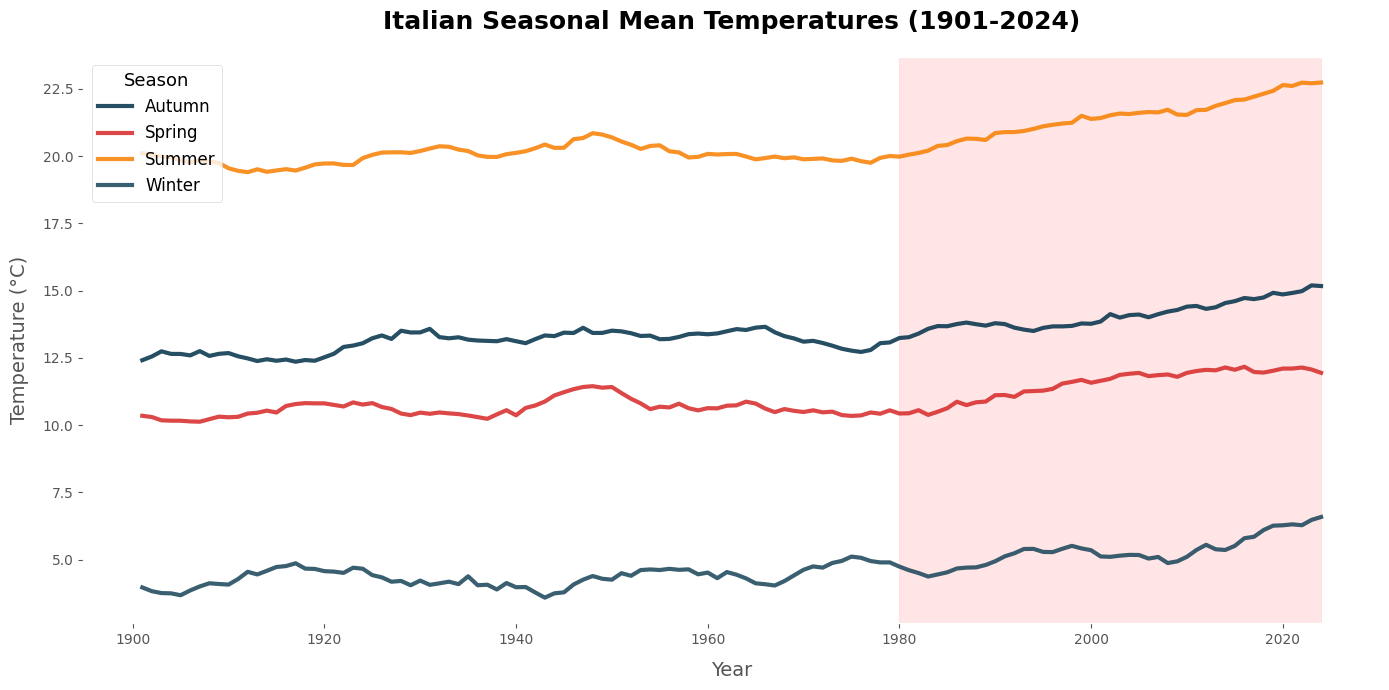

In [16]:

plt.figure(figsize=(14,7))
sns.lineplot(data=seasonal_smooth, x='year', y='tas_smooth', hue='season', 
             linewidth=3, marker='', markersize=6, alpha=0.85,
             palette=['#003049','#d62828','#f77f00',"#174358"])

plt.title("Italian Seasonal Mean Temperatures (1901-2024)", 
          fontsize=18, weight="bold", pad=20)
plt.xlabel("Year", fontsize=14, labelpad=10)
plt.ylabel("Temperature (°C)", fontsize=14, labelpad=10)
plt.grid(alpha=0.3, linestyle='--')
plt.legend(title="Season", fontsize=12, title_fontsize=13, loc='upper left')

# 📈 Evidenzia il TREND 1980-2024
plt.axvspan(1980, 2024, alpha=0.1, color='red', label='Strong Warming Trend')

plt.tight_layout()
plt.show()


In [19]:
# Assumi che df abbia colonne: date e tas
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Calcola il delta giornaliero della temperatura media
df['tas_diff'] = df['tas'].diff()  # differenza giorno per giorno

# Aggiungi anno e mese
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Filtra le stagioni di transizione
spring = df[df['month'].isin([3,4,5])]
autumn = df[df['month'].isin([9,10,11])]


# Primavera: velocità media di aumento della temperatura
spring_rate = spring.groupby('year')['tas_diff'].mean().reset_index()
spring_rate.rename(columns={'tas_diff':'spring_rate'}, inplace=True)

# Autunno: velocità media di diminuzione della temperatura
autumn_rate = autumn.groupby('year')['tas_diff'].mean().reset_index()
autumn_rate.rename(columns={'tas_diff':'autumn_rate'}, inplace=True)

# Unisci i due dataset
rate = pd.merge(spring_rate, autumn_rate, on='year')

In [21]:
rate_sm = rate.copy()
rate_sm['spring_sm'] = rate['spring_rate'].transform(
    lambda x: x.rolling(window=10, center=True, min_periods=3).mean())
rate_sm['autumn_sm'] = rate['autumn_rate'].transform(
    lambda x: x.rolling(window=10, center=True, min_periods=3).mean())

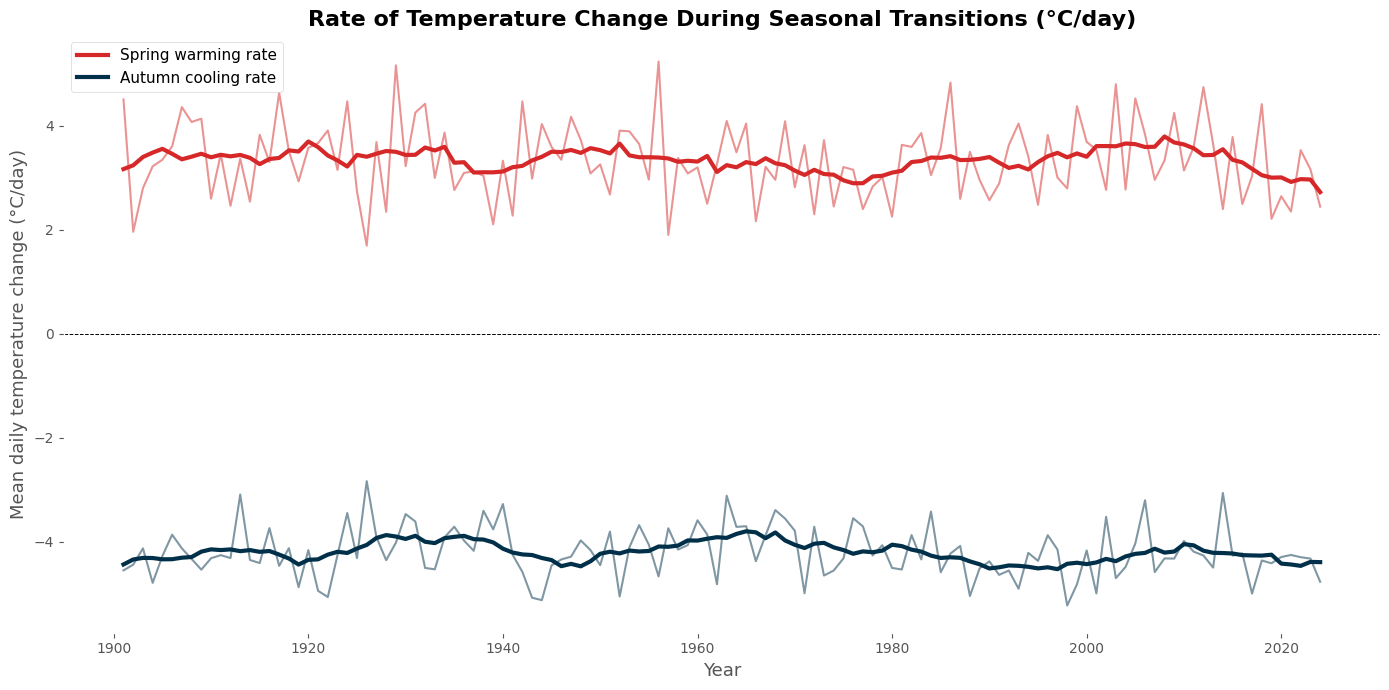

In [26]:
plt.style.use("ggplot")
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['figure.facecolor'] = '#ffffff'

plt.figure(figsize=(14,7))
plt.plot(rate['year'], rate['spring_rate'], color='#d62828', marker='',alpha = 0.5)
plt.plot(rate_sm['year'], rate_sm['spring_sm'], label='Spring warming rate', color='#d62828', marker='', linewidth = 3)
plt.plot(rate['year'], rate['autumn_rate'], color='#003049', marker='', alpha = 0.5)
plt.plot(rate_sm['year'], rate_sm['autumn_sm'], label='Autumn cooling rate', color='#003049', marker='', linewidth = 3)
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.title("Rate of Temperature Change During Seasonal Transitions (°C/day)", fontsize=16, weight="bold")
plt.xlabel("Year", fontsize=13)
plt.ylabel("Mean daily temperature change (°C/day)", fontsize=13)
plt.legend(fontsize=11)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


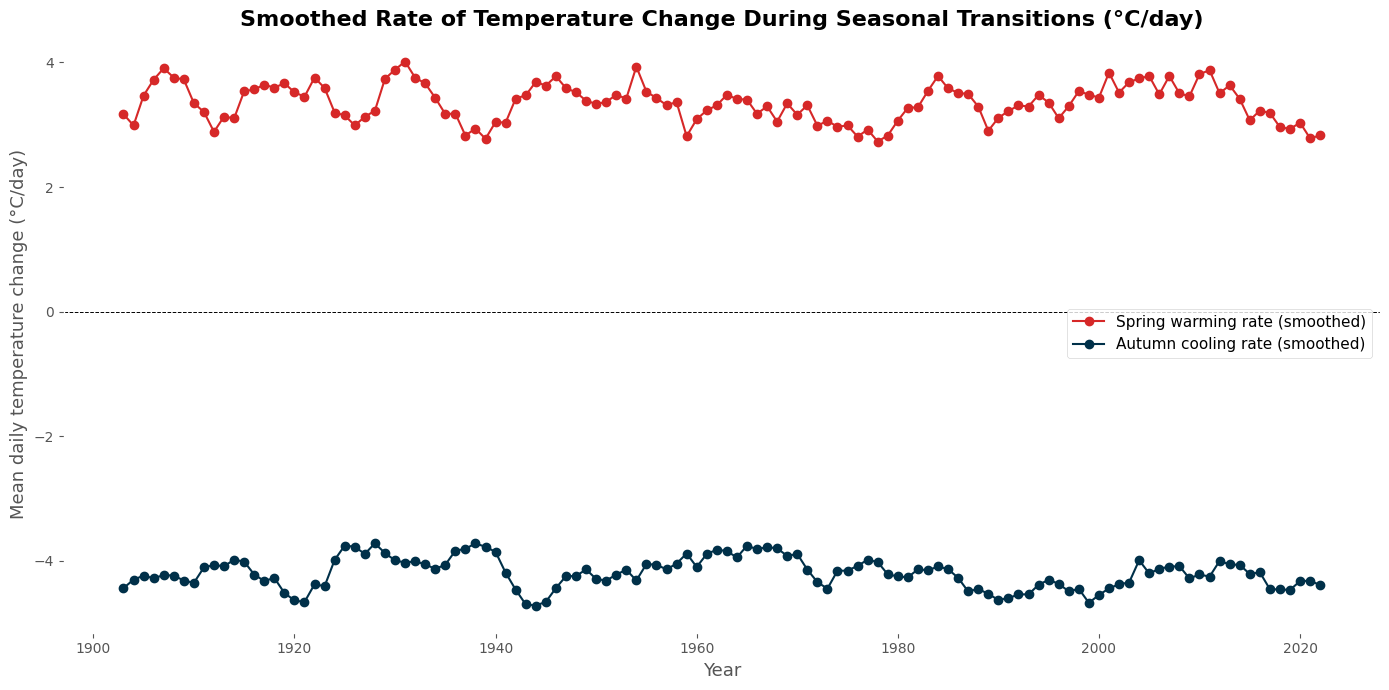

In [18]:
# Applica rolling mean (media mobile) per smussare le linee
window = 5  # finestra di 5 anni
rate['spring_rate_smooth'] = rate['spring_rate'].rolling(window=window, center=True).mean()
rate['autumn_rate_smooth'] = rate['autumn_rate'].rolling(window=window, center=True).mean()

plt.style.use("ggplot")
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['figure.facecolor'] = '#ffffff'

plt.figure(figsize=(14,7))
plt.plot(rate['year'], rate['spring_rate_smooth'], label='Spring warming rate (smoothed)', color='#d62828', marker='o')
plt.plot(rate['year'], rate['autumn_rate_smooth'], label='Autumn cooling rate (smoothed)', color='#003049', marker='o')
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.title("Smoothed Rate of Temperature Change During Seasonal Transitions (°C/day)", fontsize=16, weight="bold")
plt.xlabel("Year", fontsize=13)
plt.ylabel("Mean daily temperature change (°C/day)", fontsize=13)
plt.legend(fontsize=11)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


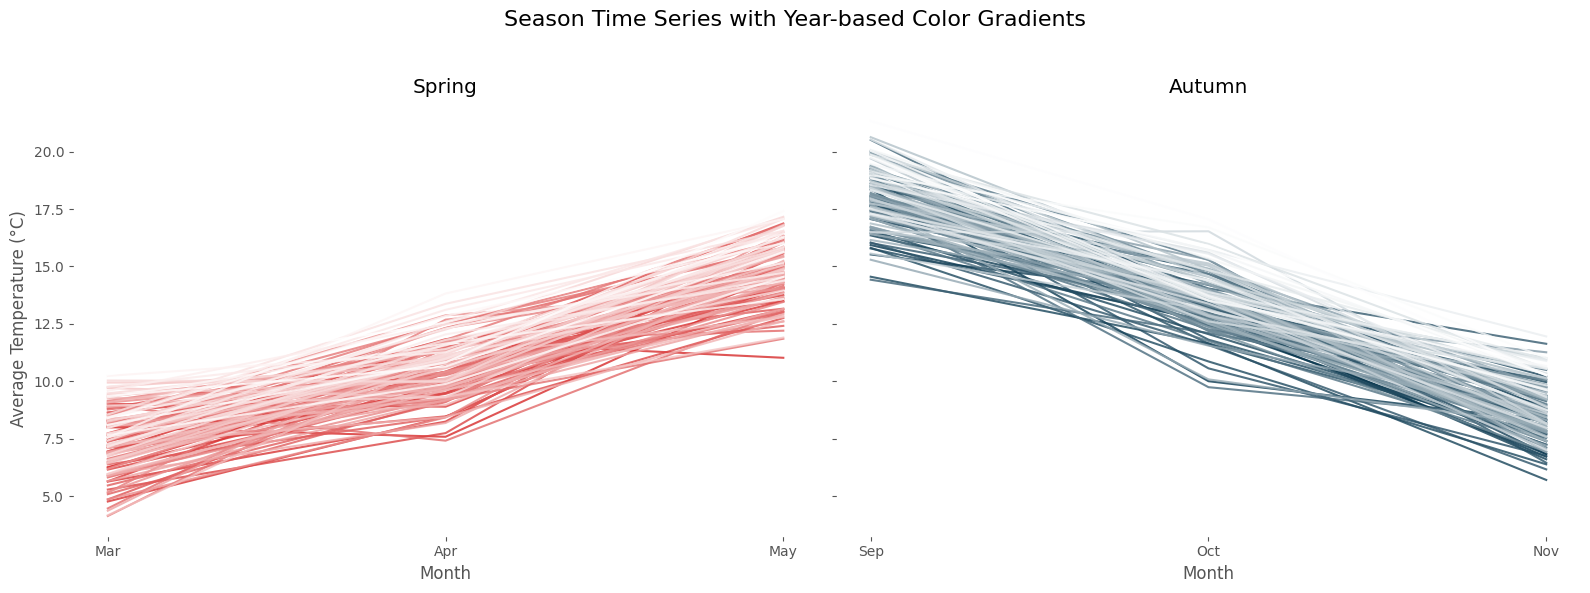

In [11]:
# Filtra per stagioni
primavera = df[df['month'].isin([3,4,5])]
autunno = df[df['month'].isin([9,10,11])]

# Ottieni gli anni unici
primavera_years = sorted(primavera['year'].unique())
autunno_years = sorted(autunno['year'].unique())

# Funzione per generare sfumature di colore
def get_colors(start_hex, n):
    start_rgb = mcolors.to_rgb(start_hex)
    end_rgb = (1,1,1)  # bianco chiaro per la sfumatura
    colors = [(
        start_rgb[0] + (end_rgb[0]-start_rgb[0])*i/(n-1),
        start_rgb[1] + (end_rgb[1]-start_rgb[1])*i/(n-1),
        start_rgb[2] + (end_rgb[2]-start_rgb[2])*i/(n-1)
    ) for i in range(n)]
    return colors

primavera_colors = get_colors('#d62828', len(primavera_years))
autunno_colors = get_colors('#003049', len(autunno_years))

# Crea la figura con 2 subplot (1 riga, 2 colonne)
fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

# --- Primavera ---
for i, year in enumerate(primavera_years):
    subset = primavera[primavera['year'] == year]
    axes[0].plot(subset['month'], subset['tas'], color=primavera_colors[i], alpha=0.8)
axes[0].set_title('Spring')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Temperature (°C)')
axes[0].set_xticks([3,4,5])
axes[0].set_xticklabels(['Mar','Apr','May'])

# --- Autunno ---
for i, year in enumerate(autunno_years):
    subset = autunno[autunno['year'] == year]
    axes[1].plot(subset['month'], subset['tas'], color=autunno_colors[i], alpha=0.8)
axes[1].set_title('Autumn')
axes[1].set_xlabel('Month')
axes[1].set_xticks([9,10,11])
axes[1].set_xticklabels(['Sep','Oct','Nov'])

plt.suptitle('Season Time Series with Year-based Color Gradients', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Third Question: Is it true that extreme temperature events are increasing more and more?

In [13]:
!pip install scipy

     --------------------------------------- 38.7/38.7 MB 21.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Percentile 90 Tmax: 25.764000000000003
Percentile 10 Tmin: 1.1570000000000007


C:\Users\tomma\AppData\Local\Temp\ipykernel_21756\112880992.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_stats = df.groupby("year").apply(lambda x: pd.Series({


   year      TX90p      TN10p    TXx   TNn
0  1901   8.333333  16.666667  26.46 -3.27
1  1902   8.333333   8.333333  26.57  0.63
2  1903   0.000000   8.333333  25.75  0.09
3  1904  16.666667   8.333333  28.31  0.19
4  1905  16.666667  16.666667  28.30 -2.26
TX90p: tau=0.317, p-value=0.00000
TN10p: tau=-0.328, p-value=0.00000
TXx: tau=0.322, p-value=0.00000
TNn: tau=0.251, p-value=0.00004


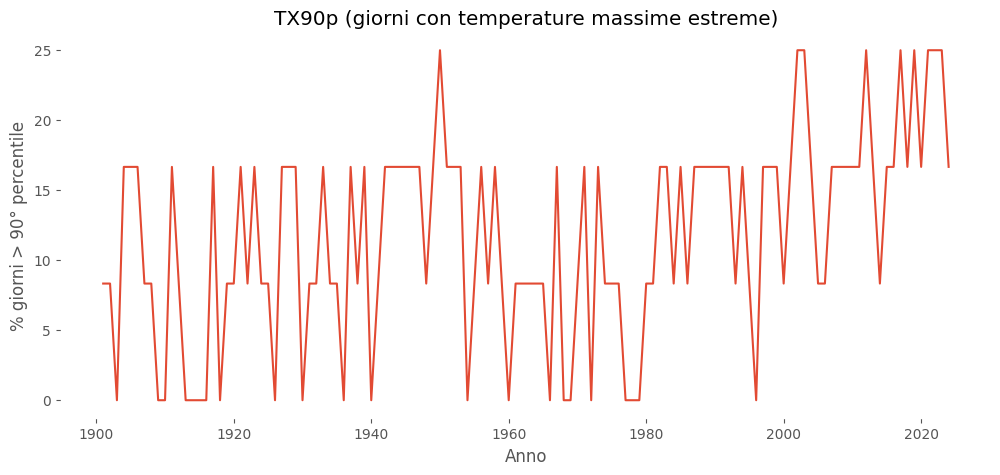

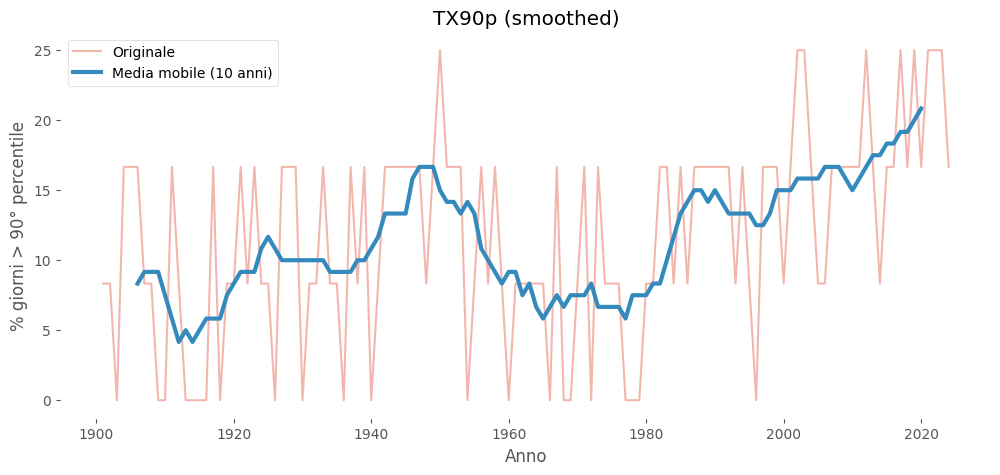

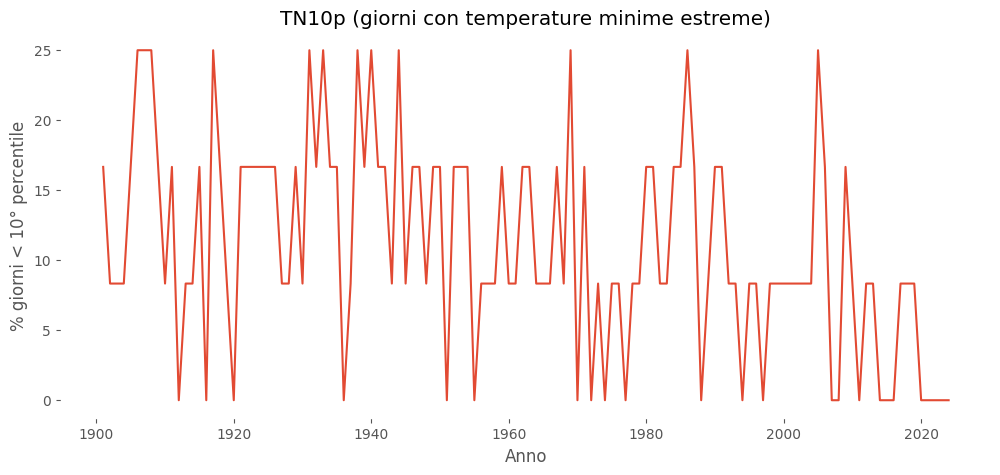

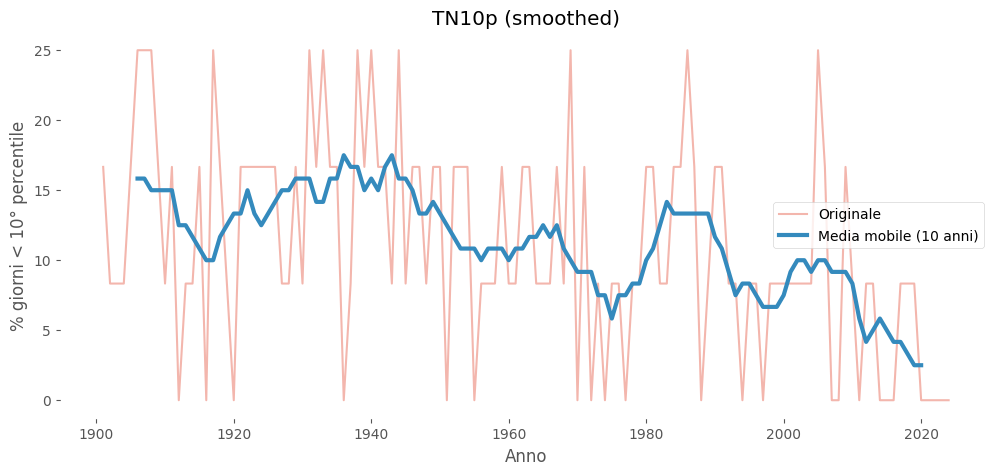

In [14]:
from scipy.stats import kendalltau
baseline = df[(df["year"] >= 1961) & (df["year"] <= 2000)]
p90_tmax = baseline["tasmax"].quantile(0.90)
p10_tmin = baseline["tasmin"].quantile(0.10)

print("Percentile 90 Tmax:", p90_tmax)
print("Percentile 10 Tmin:", p10_tmin)

# -----------------------------
# 3. CALCOLO INDICI DEGLI ESTREMI PER OGNI ANNO
# -----------------------------
annual_stats = df.groupby("year").apply(lambda x: pd.Series({
    "TX90p": (x["tasmax"] > p90_tmax).mean() * 100,   # % giorni oltre 90° percentile
    "TN10p": (x["tasmin"] < p10_tmin).mean() * 100,   # % giorni sotto 10° percentile
    "TXx": x["tasmax"].max(),                         # temp max assoluta
    "TNn": x["tasmin"].min()                          # temp min assoluta
})).reset_index()

print(annual_stats.head())

# -----------------------------
# 4. TEST DI MANN–KENDALL
# -----------------------------
def mann_kendall_test(series):
    tau, p_value = kendalltau(series.index, series.values)
    return tau, p_value

for column in ["TX90p", "TN10p", "TXx", "TNn"]:
    tau, p = mann_kendall_test(annual_stats[column])
    print(f"{column}: tau={tau:.3f}, p-value={p:.5f}")

# -----------------------------
# 5. GRAFICI DELLE TENDENZE
# -----------------------------
plt.figure(figsize=(12, 5))
plt.plot(annual_stats["year"], annual_stats["TX90p"])
plt.title("TX90p (giorni con temperature massime estreme)")
plt.xlabel("Anno")
plt.ylabel("% giorni > 90° percentile")
plt.grid(True)
plt.show()

annual_stats["TX90p_smooth"] = annual_stats["TX90p"].rolling(window=10, center=True).mean()

plt.figure(figsize=(12, 5))
plt.plot(annual_stats["year"], annual_stats["TX90p"], alpha=0.4, label="Originale")
plt.plot(annual_stats["year"], annual_stats["TX90p_smooth"], linewidth=3, label="Media mobile (10 anni)")
plt.title("TX90p (smoothed)")
plt.xlabel("Anno")
plt.ylabel("% giorni > 90° percentile")
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(12, 5))
plt.plot(annual_stats["year"], annual_stats["TN10p"])
plt.title("TN10p (giorni con temperature minime estreme)")
plt.xlabel("Anno")
plt.ylabel("% giorni < 10° percentile")
plt.grid(True)
plt.show()

annual_stats["TN10p_smooth"] = annual_stats["TN10p"].rolling(window=10, center=True).mean()

plt.figure(figsize=(12, 5))
plt.plot(annual_stats["year"], annual_stats["TN10p"], alpha=0.4, label="Originale")
plt.plot(annual_stats["year"], annual_stats["TN10p_smooth"], linewidth=3, label="Media mobile (10 anni)")
plt.title("TN10p (smoothed)")
plt.xlabel("Anno")
plt.ylabel("% giorni < 10° percentile")
plt.grid(True)
plt.legend()
plt.show()



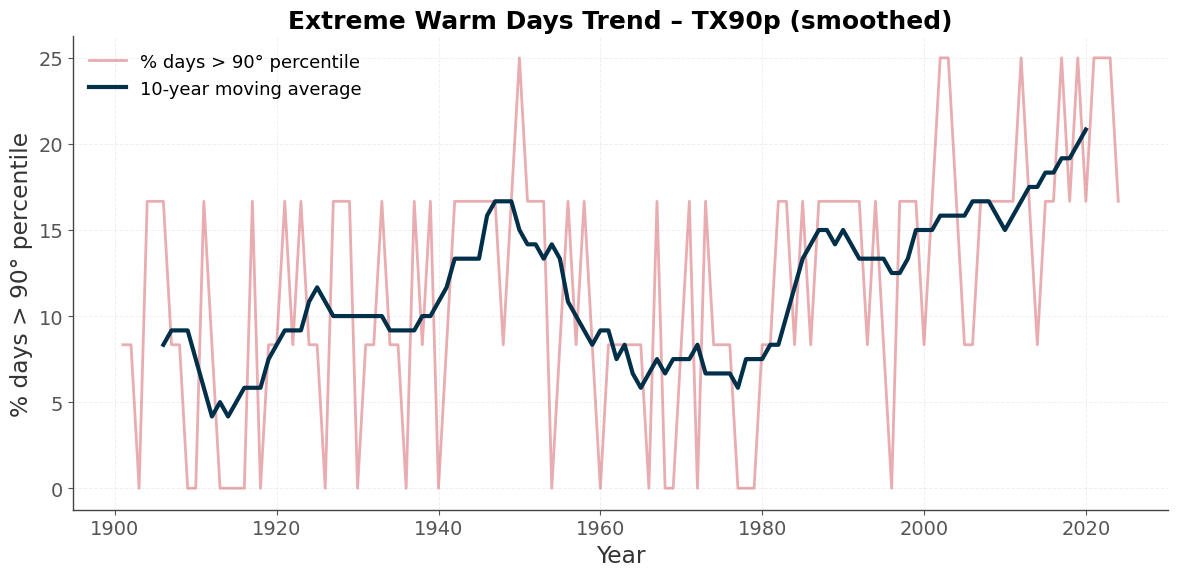

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
color_tas = "#c1121f"
color_record_line = "#003049"
color_record_points = "#780000"
# --- Stile grafico elegante ---
mpl.rcParams["figure.figsize"] = (12, 6)
mpl.rcParams["font.size"] = 14
mpl.rcParams["axes.edgecolor"] = "#444"
mpl.rcParams["axes.labelcolor"] = "#333"
mpl.rcParams["axes.titlesize"] = 18
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["xtick.color"] = "#555"
mpl.rcParams["ytick.color"] = "#555"
mpl.rcParams["grid.alpha"] = 0.3
mpl.rcParams["grid.color"] = "#cccccc"

# --- Curva smussata ---
annual_stats["TX90p_smooth"] = (
    annual_stats["TX90p"].rolling(window=10, center=True).mean()
)

# --- Plot ---
fig, ax = plt.subplots()

# Curva originale
ax.plot(
    annual_stats["year"],
    annual_stats["TX90p"],
    color="#c1121f",
    alpha=0.35,
    linewidth=2,
    label="% days > 90° percentile"
)

# Curva smussata
ax.plot(
    annual_stats["year"],
    annual_stats["TX90p_smooth"],
    color="#003049",
    linewidth=3,
    label="10-year moving average"
)

# Titolo e label
ax.set_title("Extreme Warm Days Trend – TX90p (smoothed)")
ax.set_xlabel("Year")
ax.set_ylabel("% days > 90° percentile")

# Griglia sottile
ax.grid(True, linestyle="--", linewidth=0.7)

# Layout più pulito
ax.spines["top"].set_alpha(0)
ax.spines["right"].set_alpha(0)

# Legenda elegante
leg = ax.legend(frameon=False, fontsize=13)

plt.tight_layout()
plt.show()


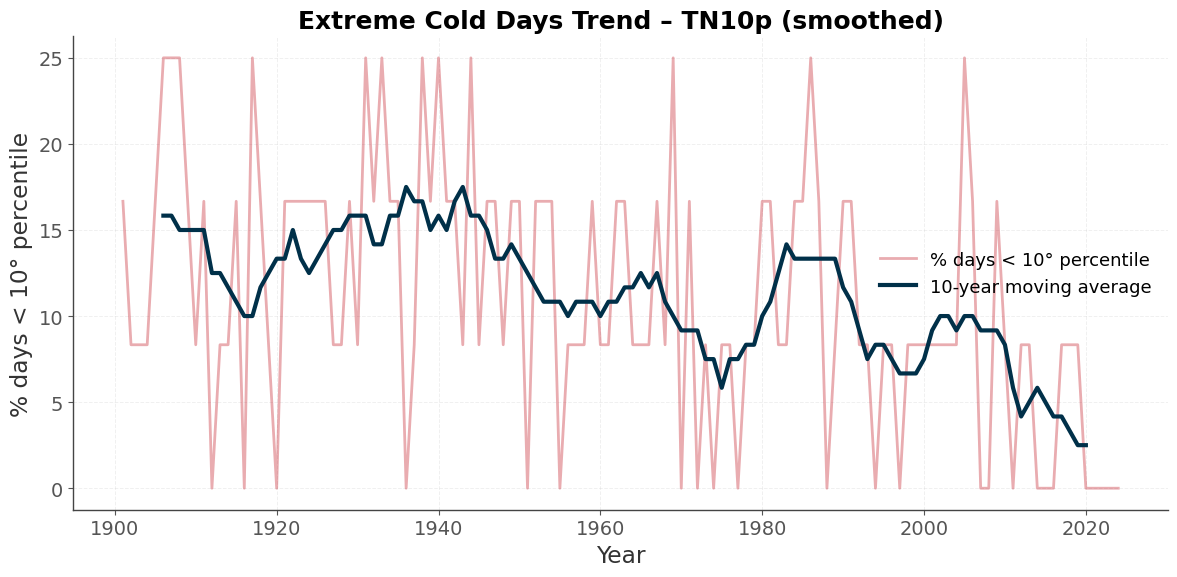

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
color_tas = "#c1121f"
color_record_line = "#003049"
color_record_points = "#780000"
# --- Stile grafico elegante ---
mpl.rcParams["figure.figsize"] = (12, 6)
mpl.rcParams["font.size"] = 14
mpl.rcParams["axes.edgecolor"] = "#444"
mpl.rcParams["axes.labelcolor"] = "#333"
mpl.rcParams["axes.titlesize"] = 18
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["xtick.color"] = "#555"
mpl.rcParams["ytick.color"] = "#555"
mpl.rcParams["grid.alpha"] = 0.3
mpl.rcParams["grid.color"] = "#cccccc"

# --- Curva smussata ---
annual_stats["TN10p_smooth"] = (
    annual_stats["TN10p"].rolling(window=10, center=True).mean()
)

# --- Plot ---
fig, ax = plt.subplots()

# Curva originale
ax.plot(
    annual_stats["year"],
    annual_stats["TN10p"],
    color="#c1121f",
    alpha=0.35,
    linewidth=2,
    label="% days < 10° percentile"
)

# Curva smussata
ax.plot(
    annual_stats["year"],
    annual_stats["TN10p_smooth"],
    color="#003049",
    linewidth=3,
    label="10-year moving average"
)

# Titolo e label
ax.set_title("Extreme Cold Days Trend – TN10p (smoothed)")
ax.set_xlabel("Year")
ax.set_ylabel("% days < 10° percentile")

# Griglia sottile
ax.grid(True, linestyle="--", linewidth=0.7)

# Layout più pulito
ax.spines["top"].set_alpha(0)
ax.spines["right"].set_alpha(0)

# Legenda elegante
leg = ax.legend(frameon=False, fontsize=13)

plt.tight_layout()
plt.show()


#### Possible Question: 
- RQ4 — Qual è il trend delle temperature minime, massime e medie su 120 anni?
- RQ5 — Le minime si stanno scaldando più delle massime? (misuro differenza tra massime e minime negli anni, nuova serie storica)


#### Fourth Question: Are the minumun temperature increasing more than the maximum temperature?

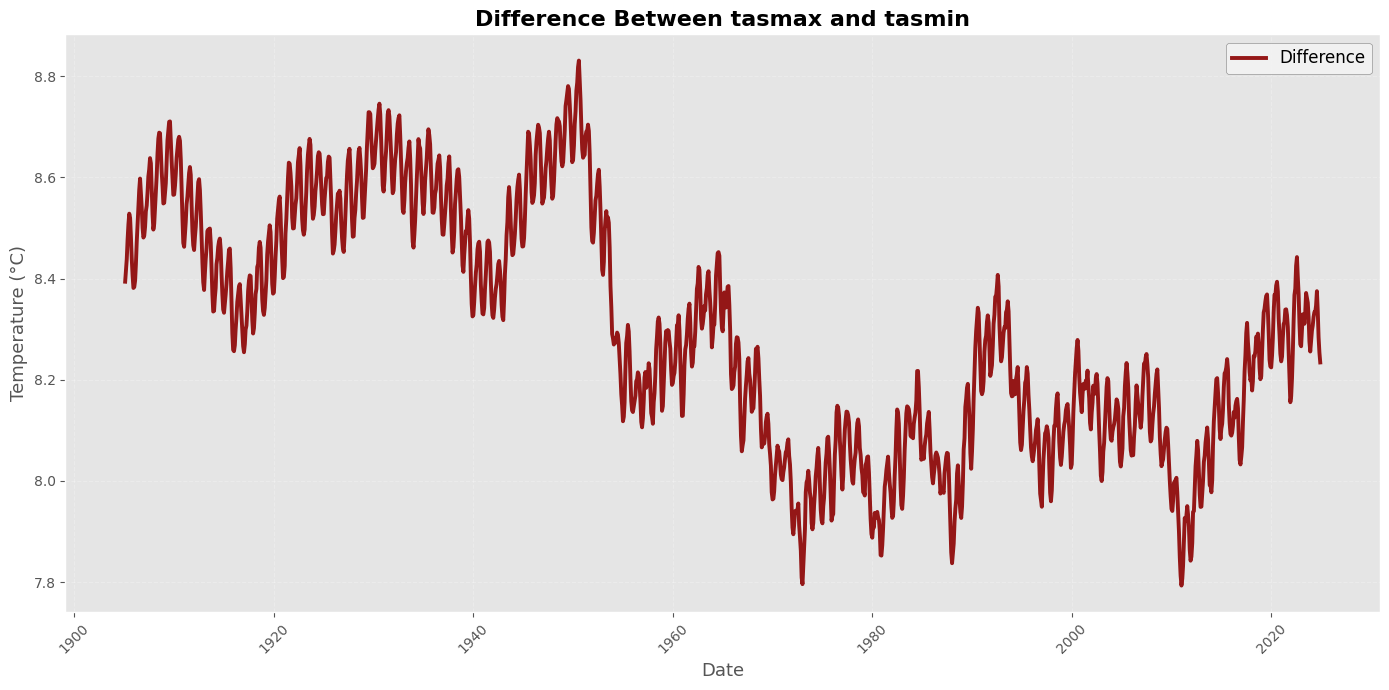

In [17]:
import matplotlib.pyplot as plt

# Calcolo differenza
df["diff"] = df["tasmax"] - df["tasmin"]
data_9424 = df  # eventualmente filtrare per date

# Rolling mean per linee morbide
smooth = data_9424[['diff','date']].rolling(window=50, on='date').mean()

# Stile generale
plt.style.use("ggplot")  # sfondo chiaro e griglia elegante

fig, ax = plt.subplots(figsize=(14, 7))

# Linea principale in rosso scuro
ax.plot(
    smooth['date'], 
    smooth['diff'], 
    color="#8B0000",  # rosso scuro
    linewidth=2.8, 
    alpha=0.9, 
    label="Difference"
)

# Titoli
ax.set_title("Difference Between tasmax and tasmin", fontsize=16, weight='bold')
ax.set_xlabel("Date", fontsize=13)
ax.set_ylabel("Temperature (°C)", fontsize=13)

# Rotazione date e stile tick
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Griglia delicata
ax.grid(alpha=0.25, linestyle='--')

# Legenda elegante
ax.legend(frameon=True, fontsize=12, edgecolor='gray', facecolor='whitesmoke')

# Layout compatto
plt.tight_layout()

plt.show()


### Global

In [38]:
import requests
import pandas as pd

# URL API
url = 'https://cckpapi.worldbank.org/api/v1/cru-x0.5_climatology_tasmax,tas,tasmin_climatology_monthly_1901-1930,1931-1960,1961-1990,1985-2014,1986-2005,1991-2020,1995-2014_mean_historical_cru_ts4.08_mean/global_countries?_format=json'

# Scarica JSON
json_file = requests.get(url).json()
data = json_file['data']
data_countries = list(data['tas']['1901-1930'].keys())
print(data_countries)


# Lista variabili e paesi europei
var = ['tas', 'tasmax', 'tasmin']
years = ['1901-1930','1931-1960','1961-1990','1985-2014','1986-2005','1991-2020','1995-2014']
europe_countries = ['ALB','AND','AUT','BEL','BGR','BIH','HRV','CYP','CZE','DNK','EST',
                    'FIN','FRA','DEU','GRC','HUN','ISL','IRL','ITA','LVA','LTU','LUX',
                    'MLT','MDA','MCO','NLD','NOR','POL','PRT','ROU','RUS','SMR','SRB',
                    'SVK','SVN','ESP','SWE','CHE','UKR','GBR']

# Crea lista di record per DataFrame
records = []

for v in var:
    for y in years:
        for country in europe_countries:
            # Controlla se il paese esiste nell'anno specifico
            if country in data[v][y]:
                for date_str, value in data[v][y][country].items():
                    if value is not None:
                        records.append({
                            "country": country,
                            "date": date_str,
                            "variable": v,
                            "value": value
                        })

# Crea DataFrame
df = pd.DataFrame(records)

print(records[:5])   # Mostra i primi 5 record estratti
print(df.columns)    # Colonne del DataFrame
print(len(df))       # Controlla se ci sono record


# Converte la data in datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')

# Facoltativo: estrai anno e mese
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Calcola la media europea per variabile e mese
df_mean = df.groupby(['variable','year','month'])['value'].mean().reset_index()

# Pivot per avere colonne separate per tas, tasmax, tasmin
df_pivot = df_mean.pivot_table(index=['year','month'], columns='variable', values='value').reset_index()

# Ricrea la colonna date come 'YYYY-MM-01'
df_pivot['date'] = pd.to_datetime(df_pivot[['year','month']].assign(day=1))

# Riordina le colonne se vuoi mettere date all'inizio
cols = ['date', 'year', 'month', 'tas', 'tasmax', 'tasmin']
df_pivot = df_pivot[cols]

print(df_pivot.head())


['ABW', 'AFG', 'AGO', 'AIA', 'ALA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATF', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BES', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLM', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BVT', 'BWA', 'CAF', 'CAN', 'CCK', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CUW', 'CXR', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUF', 'GUM', 'GUY', 'HKG', 'HMD', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IOT', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KSV', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAF', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL', 'MKD'

In [40]:
df_pivot["tas"] = df_pivot["tas"].astype(str).str.replace(".", ",", regex=False)
df_pivot["tasmin"] = df_pivot["tasmin"].astype(str).str.replace(".", ",", regex=False)
df_pivot["tasmax"] = df_pivot["tasmax"].astype(str).str.replace(".", ",", regex=False)
df_pivot.to_csv("temperature_europe.csv")
df_pivot["tas"] = df_pivot["tas"].astype(str).str.replace(",", ".", regex=False)
df_pivot["tasmin"] = df_pivot["tasmin"].astype(str).str.replace(",", ".", regex=False)
df_pivot["tasmax"] = df_pivot["tasmax"].astype(str).str.replace(",", ".", regex=False)
df_pivot["tas"] = df_pivot["tas"].astype(float)
df_pivot["tasmin"] = df_pivot["tasmin"].astype(float)
df_pivot["tasmax"] = df_pivot["tasmax"].astype(float)



In [68]:
import requests
import pandas as pd

# URL API
url = 'https://cckpapi.worldbank.org/api/v1/cru-x0.5_climatology_tasmax,tas,tasmin_climatology_monthly_1901-1930,1931-1960,1961-1990,1985-2014,1986-2005,1991-2020,1995-2014_mean_historical_cru_ts4.08_mean/global_countries?_format=json'

# Scarica JSON
json_file = requests.get(url).json()
data = json_file['data']
data_countries = list(data['tas']['1901-1930'].keys())
print(data_countries)


# Lista variabili e paesi europei
var = ['tas', 'tasmax', 'tasmin']
years = ['1901-1930','1931-1960','1961-1990','1985-2014','1986-2005','1991-2020','1995-2014']
europe_countries = ['BEL','FRA','ESP','ITA']

# Crea lista di record per DataFrame
records = []

for v in var:
    for y in years:
        for country in europe_countries:
            # Controlla se il paese esiste nell'anno specifico
            if country in data[v][y]:
                for date_str, value in data[v][y][country].items():
                    if value is not None:
                        records.append({
                            "country": country,
                            "date": date_str,
                            "variable": v,
                            "value": value
                        })

# Crea DataFrame
df = pd.DataFrame(records)

print(records[:5])   # Mostra i primi 5 record estratti
print(df.columns)    # Colonne del DataFrame
print(len(df))       # Controlla se ci sono record


# Converte la data in datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')

# Facoltativo: estrai anno e mese
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Pivot per avere colonne separate per tas, tasmax, tasmin PER PAESE
df_pivot = df.pivot_table(index=['country','year','month'], columns='variable', values='value').reset_index()

# Ricrea la colonna date come 'YYYY-MM-01'
df_pivot['date'] = pd.to_datetime(df_pivot[['year','month']].assign(day=1))

# Riordina le colonne
cols = ['country', 'date', 'year', 'month', 'tas','tasmin','tasmax']
df_pivot = df_pivot[cols]
df_pivot.drop(columns="tasmax")
print(df_pivot.head())


['ABW', 'AFG', 'AGO', 'AIA', 'ALA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATF', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BES', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLM', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BVT', 'BWA', 'CAF', 'CAN', 'CCK', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CUW', 'CXR', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUF', 'GUM', 'GUY', 'HKG', 'HMD', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IOT', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KSV', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAF', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL', 'MKD'

In [58]:
df_pivot.isna().sum()

variable
country    0
date       0
year       0
month      0
tas        0
tasmin     0
tasmax     0
dtype: int64

In [66]:
!pip install openpyxl

     -------------------------------------- 250.9/250.9 kB 1.5 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
import openpyxl
df_pivot["tas"] = df_pivot["tas"].astype(str).str.replace(".", ",", regex=False)
df_pivot.to_excel("temperature_europe.xlsx")
df_pivot["tas"] = df_pivot["tas"].astype(str).str.replace(",", ".", regex=False)
df_pivot["tas"] = df_pivot["tas"].astype(float)



### Global Map for each Season:

In [22]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# URL API
url = 'https://cckpapi.worldbank.org/api/v1/cru-x0.5_climatology_tasmax,tas,tasmin_climatology_monthly_1901-1930,1931-1960,1961-1990,1985-2014,1986-2005,1991-2020,1995-2014_mean_historical_cru_ts4.08_mean/global_countries?_format=json'

# Scarica JSON
json_file = requests.get(url).json()
data = json_file['data']
data_countries = list(data['tas']['1901-1930'].keys())
print(data_countries)

['ABW', 'AFG', 'AGO', 'AIA', 'ALA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATF', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BES', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLM', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BVT', 'BWA', 'CAF', 'CAN', 'CCK', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CUW', 'CXR', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUF', 'GUM', 'GUY', 'HKG', 'HMD', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IOT', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KSV', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAF', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL', 'MKD'

In [6]:
for y in data['tas']:
    print(y)

1901-1930
1931-1960
1961-1990
1985-2014
1986-2005
1991-2020
1995-2014


In [26]:
country_data = data['tas']['1991-2020']
country_data

{'ABW': {'1991-01': 27.48,
  '1991-02': 27.45,
  '1991-03': 27.91,
  '1991-04': 28.74,
  '1991-05': 29.57,
  '1991-06': 29.91,
  '1991-07': 29.99,
  '1991-08': 30.48,
  '1991-09': 30.78,
  '1991-10': 29.95,
  '1991-11': 28.67,
  '1991-12': 27.99},
 'AFG': {'1991-01': 0.52,
  '1991-02': 2.85,
  '1991-03': 8.33,
  '1991-04': 14.18,
  '1991-05': 18.96,
  '1991-06': 23.38,
  '1991-07': 25.46,
  '1991-08': 24.06,
  '1991-09': 19.38,
  '1991-10': 13.78,
  '1991-11': 7.18,
  '1991-12': 2.87},
 'AGO': {'1991-01': 22.74,
  '1991-02': 22.86,
  '1991-03': 22.92,
  '1991-04': 22.46,
  '1991-05': 21.09,
  '1991-06': 18.8,
  '1991-07': 18.43,
  '1991-08': 20.3,
  '1991-09': 22.29,
  '1991-10': 23.31,
  '1991-11': 22.92,
  '1991-12': 22.77},
 'AIA': {'1991-01': 26.4,
  '1991-02': 26.4,
  '1991-03': 26.68,
  '1991-04': 27.3,
  '1991-05': 27.97,
  '1991-06': 28.84,
  '1991-07': 29,
  '1991-08': 29.26,
  '1991-09': 29.17,
  '1991-10': 28.82,
  '1991-11': 27.93,
  '1991-12': 26.9},
 'ALA': {'1991-01': -2

In [21]:
date = []
tas = []
nation = []

for count in country_data:
    
    dc = country_data[count]
    for t in dc:
        nation.append(count)
        date.append(t)
        tas.append(dc[t])
    

df = pd.DataFrame({
    "date": date,
    "tas": tas,
    "nation": nation})
df.head()

,date,tas,nation
0,1991-01,27.48,ABW
1,1991-02,27.45,ABW
2,1991-03,27.91,ABW
3,1991-04,28.74,ABW
4,1991-05,29.57,ABW


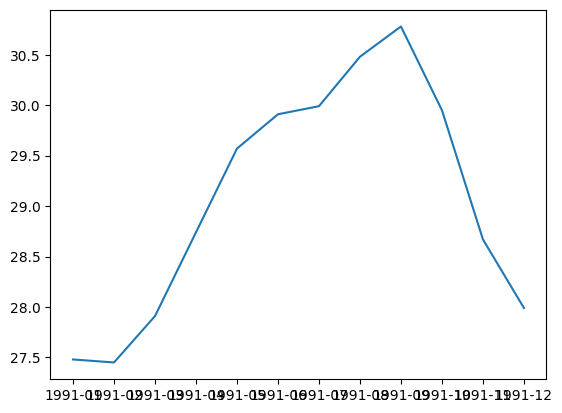

In [24]:
data_plot = df[df["nation"] == "ABW"]
plt.figure()
plt.plot( data_plot["date"], data_plot['tas'])
plt.show()

In [29]:
# Converti le date
df['date'] = pd.to_datetime(df['date']) 
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Definisci le stagioni
def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(season)

# Calcola la temperatura media stagionale per anno
seasonal_avg = df.groupby(['year', 'season', 'nation'])['tas'].mean().reset_index()


In [41]:
!pip install plotly kaleido

     ---------------------------------------- 9.9/9.9 MB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 69.0/69.0 kB ? eta 0:00:00
     -------------------------------------- 426.4/426.4 kB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 49.3/49.3 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 131.4/131.4 kB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 75.9/75.9 kB 4.1 MB/s eta 0:00:00
     -------------------------------------- 373.7/373.7 kB 4.7 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
# Requisiti:
# pip install plotly pandas kaleido   (kaleido è necessario solo se vuoi esportare PNG)

import plotly.express as px
import pandas as pd
import plotly.io as pio
pio.renderers.default = "browser"


# --- Assunzione: seasonal_avg è il dataframe che hai mostrato,
# con colonne: year, season, nation (ISO3), tas (temperatura media)

# Esempio minimal se vuoi testare: (rimuovi se hai seasonal_avg già caricato)
# seasonal_avg = pd.DataFrame({
#     "year":[1991,1991,1991],
#     "season":["Summer","Summer","Summer"],
#     "nation":["ITA","FRA","ESP"],
#     "tas":[22.5,21.0,23.5]
# })

# 1) Filtra stagione (e opzionalmente anno)
selected_season = "Autumn"   # Winter, Spring, Summer, Autumn
# selected_year = 1991       # decommenta se vuoi limitare anche all'anno

df_plot = seasonal_avg[seasonal_avg["season"] == selected_season].copy()
# Se vuoi filtrare per anno, decommenta:
# df_plot = df_plot[df_plot["year"] == selected_year]

# Controllo rapido: assicurati che 'nation' sia ISO3 a 3 lettere
# Se non lo è, bisogna mappare i nomi -> ISO3 (ti do il codice se serve)
print("Paesi nel dataset (prime 10):", df_plot["nation"].unique()[:10])

# 2) Crea la choropleth con Plotly
fig = px.choropleth(
    df_plot,
    locations="nation",       # ISO-3 codes (es. ITA, FRA, USA)
    color="tas",              # valore da mappare
    hover_name="nation",      # mostra il codice; puoi usare un nome reale se lo hai
    hover_data={"tas":True, "year":True},
    color_continuous_scale="Turbo",  # scala colori (non obbligatoria)
    projection="natural earth",
    title=f"Average Seasonal Temperature — {selected_season}"
)

fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0}
)

# 3) Mostra interattivamente (in Jupyter questo aprirà la figura)
fig.show()

# 4) Salva su file HTML (interattivo)
html_out = f"seasonal_temp_{selected_season}.html"
fig.write_html(html_out)
print(f"Saved interactive map to {html_out}")

# 5) (Opzionale) Esporta PNG - richiede 'kaleido' (pip install kaleido)
try:
    png_out = f"seasonal_temp_{selected_season}.png"
    fig.write_image(png_out, scale=2)
    print(f"Saved static PNG to {png_out}")
except Exception as e:
    print("Export PNG failed (kaleido might be missing). Exception:", e)
    print("If you want PNG export, run: pip install kaleido")


Paesi nel dataset (prime 10): ['ABW' 'AFG' 'AGO' 'AIA' 'ALA' 'ALB' 'AND' 'ARE' 'ARG' 'ARM']
Saved interactive map to seasonal_temp_Autumn.html
Saved static PNG to seasonal_temp_Autumn.png
